In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("Crime_Incidents_in_2024.csv")

# Extracting Date info

In [36]:
date_fields = ['REPORT_DAT','START_DATE','END_DATE']

for column in date_fields:
    
    df[column] = pd.to_datetime(df[column], format='%Y/%m/%d %H:%M:%S%z')

    df[f'{column}_Month'] = df[column].dt.month
    df[f'{column}_Day'] = df[column].dt.day

# Handling Missing values

In [37]:
df['DURATION_DAYS'] = (df['END_DATE'] - df['START_DATE']).dt.days

median_duration = df['DURATION_DAYS'].mean()

df['CALCULATED_END_DATE'] = df['START_DATE'] + pd.to_timedelta(median_duration, unit='D')

df['END_DATE'] = df['END_DATE'].fillna(df['CALCULATED_END_DATE'])

df['END_DATE_Month'] = df['END_DATE'].dt.month.astype('Int64')
df['END_DATE_Day'] = df['END_DATE'].dt.day.astype('Int64')

# Dropping Unnecessary 

In [38]:
df.drop(columns=date_fields+['OCTO_RECORD_ID','BID','CCN','OBJECTID','X','Y','DURATION_DAYS','CALCULATED_END_DATE'], inplace=True)

# Label Encoding

In [39]:
categorical_fields= ['SHIFT','METHOD','OFFENSE','BLOCK','ANC','BLOCK_GROUP']

for column in categorical_fields:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

# Strings modification and converstions

In [40]:
df['NEIGHBORHOOD_CLUSTER'] = df['NEIGHBORHOOD_CLUSTER'].dropna().str.replace('Cluster ', '', regex=False).astype(int)

df['VOTING_PRECINCT'] = df['VOTING_PRECINCT'].dropna().str.replace('Precinct ', '', regex=False).astype(int)

# Rows Drop

In [41]:
df = df.dropna()

# Info

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28505 entries, 0 to 29294
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SHIFT                 28505 non-null  int32  
 1   METHOD                28505 non-null  int32  
 2   OFFENSE               28505 non-null  int32  
 3   BLOCK                 28505 non-null  int32  
 4   XBLOCK                28505 non-null  float64
 5   YBLOCK                28505 non-null  float64
 6   WARD                  28505 non-null  float64
 7   ANC                   28505 non-null  int32  
 8   DISTRICT              28505 non-null  float64
 9   PSA                   28505 non-null  float64
 10  NEIGHBORHOOD_CLUSTER  28505 non-null  float64
 11  BLOCK_GROUP           28505 non-null  int32  
 12  CENSUS_TRACT          28505 non-null  float64
 13  VOTING_PRECINCT       28505 non-null  float64
 14  LATITUDE              28505 non-null  float64
 15  LONGITUDE             28

# Checking Missing Values

In [43]:
print("Missing values count and percentages:\n")
print(pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': df.isnull().mean() * 100
}))
print("\n--------------------------------------------------------------------------\n")

Missing values count and percentages:

                      Missing Count  Missing Percentage
SHIFT                             0                 0.0
METHOD                            0                 0.0
OFFENSE                           0                 0.0
BLOCK                             0                 0.0
XBLOCK                            0                 0.0
YBLOCK                            0                 0.0
WARD                              0                 0.0
ANC                               0                 0.0
DISTRICT                          0                 0.0
PSA                               0                 0.0
NEIGHBORHOOD_CLUSTER              0                 0.0
BLOCK_GROUP                       0                 0.0
CENSUS_TRACT                      0                 0.0
VOTING_PRECINCT                   0                 0.0
LATITUDE                          0                 0.0
LONGITUDE                         0                 0.0
REPORT_DA

# Checking Correlation

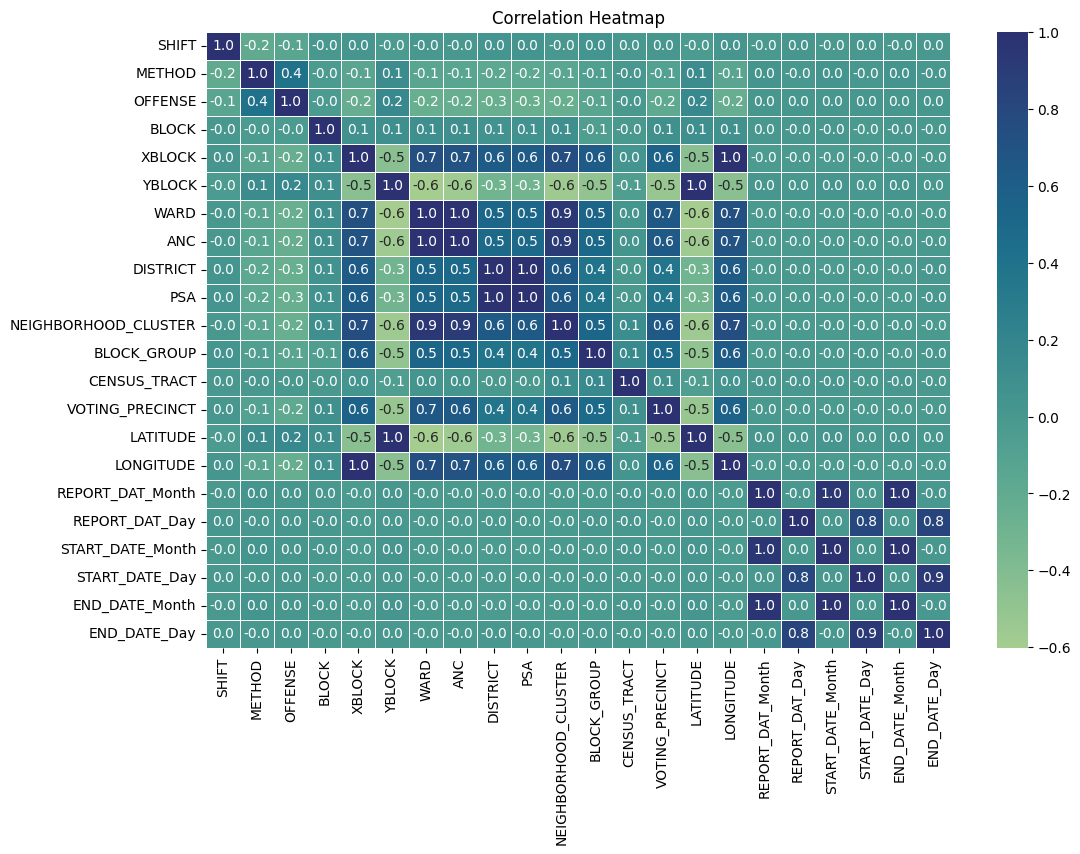

In [55]:
columns  = df.columns

np.random.seed(42)

# Computing correlation matrix
corr_matrix = df_scaled.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest", linewidths=0.5,fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

In [45]:
df_scaled

,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,...,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,REPORT_DAT_Month,REPORT_DAT_Day,START_DATE_Month,START_DATE_Day,END_DATE_Month,END_DATE_Day
0,0,2,7,493,396384.270000,137427.760000,2.0,7,2.0,207.0,...,10700.0,17.0,38.904699,-77.041686,4,12,4.0,12.0,4,12
1,1,2,8,2711,395709.910000,137490.940000,2.0,5,2.0,207.0,...,5501.0,4.0,38.905265,-77.049461,4,14,4.0,14.0,4,15
2,0,2,8,763,397497.550000,137053.130000,2.0,7,2.0,209.0,...,10100.0,129.0,38.901328,-77.028849,4,15,4.0,15.0,4,15
3,2,0,3,4480,400040.610046,129046.472149,8.0,44,7.0,706.0,...,9802.0,125.0,38.829204,-76.999532,7,30,4.0,15.0,4,15
4,2,2,8,585,397171.110000,137408.250000,2.0,7,2.0,207.0,...,10100.0,17.0,38.904526,-77.032614,1,28,1.0,28.0,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29290,2,0,1,5282,400089.040000,137531.630000,6.0,32,5.0,501.0,...,10602.0,83.0,38.905642,-76.998973,3,20,3.0,20.0,3,20
29291,1,2,7,1207,397228.740000,137931.790000,2.0,10,3.0,307.0,...,5003.0,16.0,38.909243,-77.031952,2,28,2.0,28.0,2,29
29292,2,2,4,3928,403784.430000,135262.060000,7.0,35,6.0,603.0,...,7703.0,107.0,38.885189,-76.956381,3,4,3.0,4.0,3,4
29293,0,2,8,2048,396307.960000,137321.650000,2.0,7,2.0,207.0,...,10700.0,17.0,38.903743,-77.042565,3,4,3.0,4.0,3,4
